<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/ML_T1_sencillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

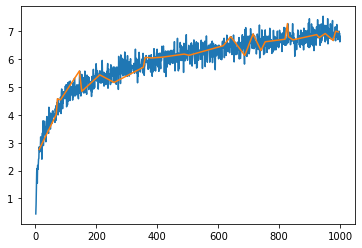

In [9]:
#Resolvamos el problema original.
import numpy as np
import matplotlib.pyplot as plt
def GD_N(theta,alpha,eta,nIter, grad,stop_crit=10**(-4)):#GD Nesterov.
    p     = np.zeros(theta.shape)
    Theta=[theta]
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta)
        p = 0.5*(g + eta*p)
        if(np.linalg.norm(g)<stop_crit):
            if(t==0):
                print("No hizo nada\n")
            break
        theta = theta - alpha*p
        Theta.append(theta)
    print("Iteraciones: ",t)
    return Theta[-1]
#Datos-----------------
np.random.seed(0)
n=1000
x=np.linspace(1,n,n)
y=np.log(x)+np.random.normal(0,.25,size=len(x))
from numpy.random import default_rng
m=30
x_m=np.sort(default_rng().choice(np.arange(0, len(x)), size=m, replace=False))
y_m=y[x_m]
plt.plot(x,y)
plt.plot(x_m,y_m)
#-----------------------------

In [10]:
def matriz_phi_sigma(sigma):#Matriz Phi
    M=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = np.exp(-((x[i] -x_m[j])**2)/(2*(sigma[j])**2))#*((x_m[i] -x_m[j])**2)/(2*sigma[i]**3)
    return M

In [11]:
def solve_for_alphas(M):#Resolver para alphas.
    return np.dot(np.dot(np.linalg.inv(np.dot(M.T,M)),M.T),y)
#solve_for_alphas(matriz_phi_sigma(np.repeat(1,m)))

#Asi ya puedo resolver para alpha, dado sigma.

In [12]:
def phi(s,x,x_j):#Funciones reales. phi_{i,j}"
    return np.exp(-(1/(2*s**2))*(x-x_j)**2)
def J_sigma_phi(sigma,alpha):#Jacobiana de la transformacion Phi*alpha como funcion de sigma.
    J=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            J[i][j]=alpha[j]*(phi(s=sigma[j],x=x[i],x_j=x_m[j]))*((x[i]-x_m[j])**2/sigma[j]**3)
    return J
#J_sigma_phi(sigma=np.repeat(1,100),alpha=np.repeat(1,100))


In [13]:
def F_ajuste(sigma,alpha,z):#Funcion de ajuste dado alpha, sigma, x. Con x real
    sum=0
    for j in range(m):
        sum+=alpha[j]*np.exp(-(1/(2*sigma[j]**2))*(z-x_m[j])**2)
    return sum

Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9
Iteraciones:  9


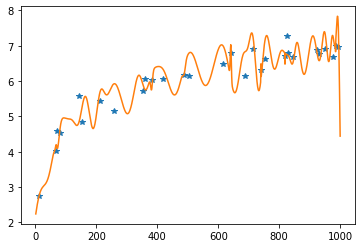

(array([ 2.21338479,  0.21279711, -0.5688278 ,  4.67090183, -2.14919011,
        6.21923115,  1.78475997,  5.86393047,  6.06086527, -1.44977463,
       -0.45835904,  4.70250181, -0.23204996,  6.42983418,  6.75377492,
        0.99069343,  4.49019121,  3.94819894,  0.4423045 ,  6.29896379,
       -0.30946502, -3.79312626, 10.67621982, -1.2305422 ,  8.44399601,
       -2.14433697,  2.86635564,  5.50435219, -0.27833068,  5.74481864]), array([ 23.05767975,   2.26836473,   6.08036159,  33.76336242,
        15.4216451 ,  26.571236  ,  14.25778105,  44.40260796,
        30.99535796,  14.61289313,   3.00231132,  30.41251395,
         3.89486744,  43.55673075,  44.54673768,  -1.74898269,
        18.78036673,  12.57080292,  -0.14196879,  21.29038226,
        -0.27854812, -16.660127  ,  33.40185501,  -8.71156951,
        28.75487026, -16.47108577, -10.62768639, -10.21183152,
         0.08703374,  -6.53888185]))


In [15]:
def rutina(n,sigma_0,alpha_0):#Repetir los ajustes alternados.
    for r in range(n): 
        alpha_0=solve_for_alphas(matriz_phi_sigma(sigma_0))
        def grad_alpha(sigma):
            return np.dot(-J_sigma_phi(sigma=sigma,alpha=alpha_0).T,(y-np.dot(matriz_phi_sigma(sigma=sigma),alpha_0)))
        sigma_0=GD_N(theta=sigma_0,alpha=0.1,eta=0.9,nIter=k, grad=grad_alpha,stop_crit=10**(-6))
    def F_ajuste_a_s(W):
       R=[]
       for w in W:
           R.append(F_ajuste(sigma=sigma_0,alpha=alpha_0,z=w))
       return np.array(R)
    plt.plot(x_m,y_m,'*')
    plt.plot(x,F_ajuste_a_s(x))
    plt.show()
    return alpha_0,sigma_0
sigma_0=np.random.normal(3,0,size=m)
alpha_0=np.repeat(1,m)
k=10
print(rutina(10,sigma_0=sigma_0,alpha_0=alpha_0))